In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

sns.set_style('darkgrid')

## Helper functions

In [2]:
def plot_bar_charts(data, title, ax=None):
    ax = data.plot.bar(ax=ax)
    ax.set_ylim(0, 0.25)

    # set x labels to %
    vals = ax.get_yticks()
    ax.set_yticklabels(['{}%'.format(int(x * 100)) for x in vals])

    ax.set_axisbelow(True)
    ax.grid(color='#cccccc', linestyle='dashed')
    plt.xticks(rotation=0)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_title(title, fontdict={"fontsize": 12}, y=-0.1)

    # plt.show()


def plot_pie_chart(data, column, ax, only_keep_na=False):
    if only_keep_na:
        data = data[data[column].isna()]["Potability"]
    else:
        data = data["Potability"]
    df = pd.Series([data.sum(), len(data) - data.sum()], index=['Potable', 'Not Potable'], name="")
    if only_keep_na:
        plot, = df.plot.pie(subplots=True, legend=False, labels=['', ''], ax=ax)
        plot.set_title("Datapoints where " + column + " is missing", fontdict={"fontsize": 12}, y=-0.1)
    else:
        plot, = df.plot.pie(subplots=True, legend=False, ax=ax, labeldistance=None)
        plot.set_axis_off()
        plot.legend(["Potable", 'Not potable'], loc=(1, 1), fontsize=12)
        plot.set_title("All datapoints", fontdict={"fontsize": 12}, y=-0.1)

## Charger les données

In [3]:
df = pd.read_csv("./data/drinking_water_potability.csv")
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885482,17.927806,71.976601,4.370562,0


## Exploration des données

In [4]:
df.shape

(3276, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
ph                 2785 non-null float64
Hardness           3276 non-null float64
Solids             3276 non-null float64
Chloramines        3276 non-null float64
Sulfate            2495 non-null float64
Conductivity       3276 non-null float64
Organic_carbon     3276 non-null float64
Trihalomethanes    3114 non-null float64
Turbidity          3276 non-null float64
Potability         3276 non-null int64
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

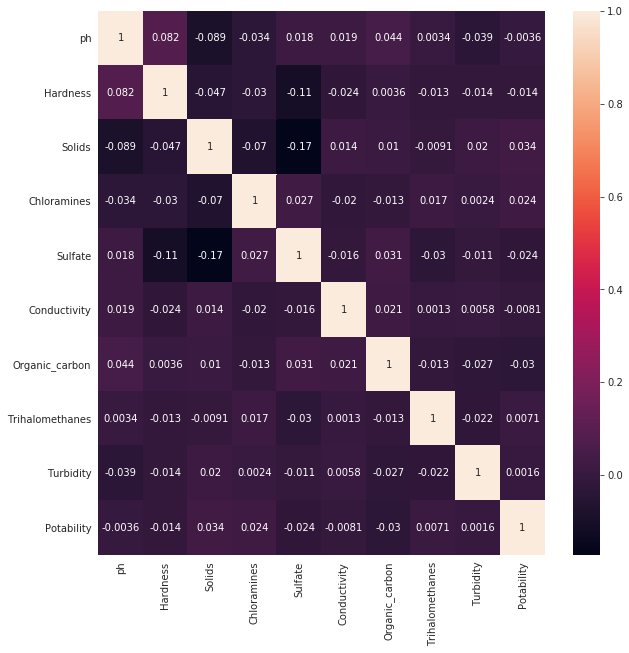

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

In [10]:
corr = df.corr()
corr["Potability"].sort_values(ascending = False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64

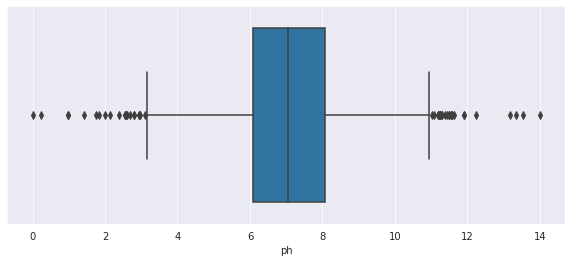

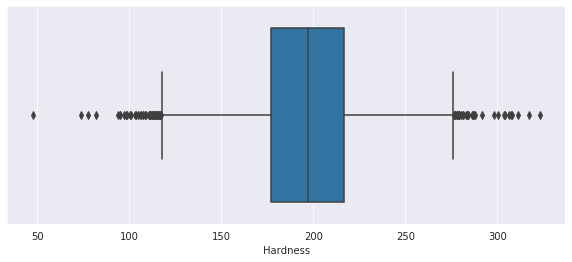

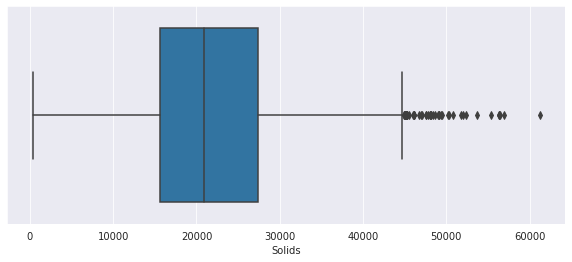

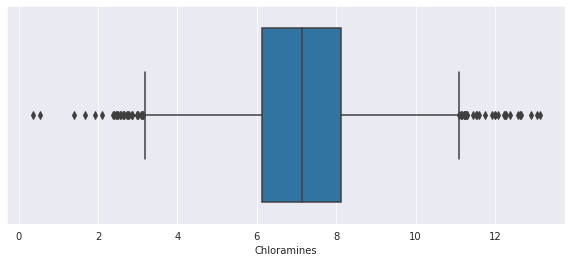

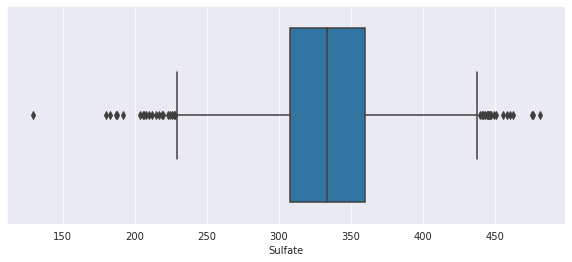

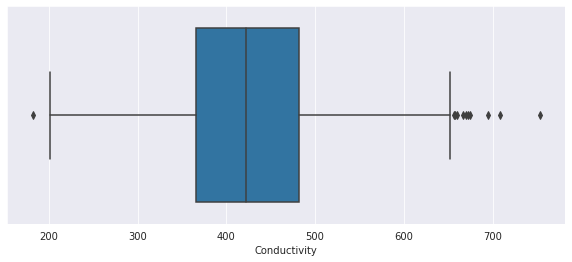

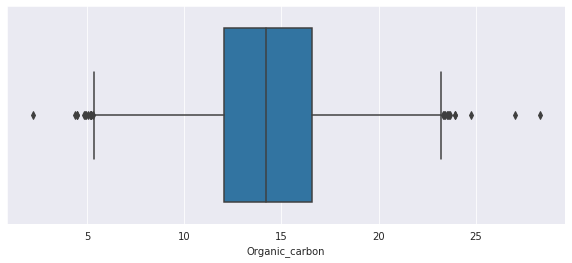

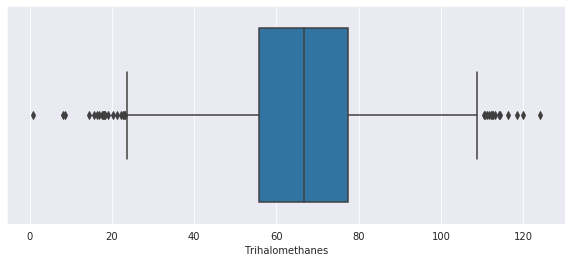

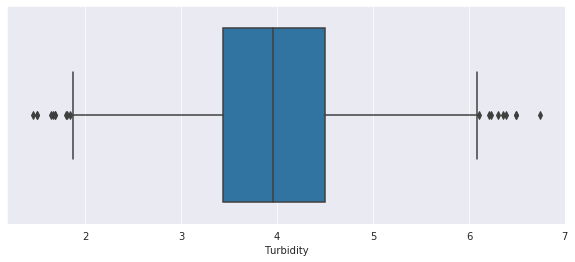

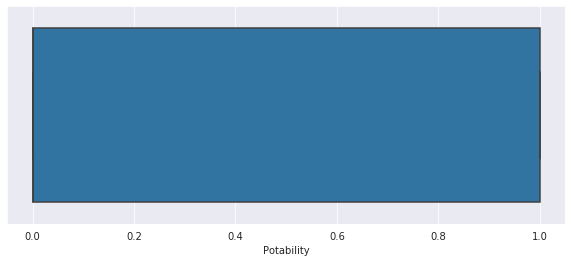

In [11]:
for column in df.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(df[column])

## Dataset quality

Ici, on se demande si le dataset contient des valeurs abberantes 

In [12]:
#ph inadmissible
ph_inad = df[((df["ph"] < 5) | (df["ph"] > 9)) & (df["Potability"] == 1) ]
print("Nombre d'instances labellisées en potable avec un ph hors de [5,9]: {}".format(len(ph_inad)))

Nombre d'instances labellisées en potable avec un ph hors de [5,9]: 184


In [13]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [14]:
#TDS inadmissible
tds_inad = df[((df["Solids"] < 600) | (df["Solids"] > 1000)) & (df["Potability"] == 1) ]
print("Nombre d'instances labellisées en potable avec un tds hors de [600,1000]: {}".format(len(tds_inad)))

Nombre d'instances labellisées en potable avec un tds hors de [600,1000]: 1277


In [15]:
#Chloramines inadmissible
chl_inad = [(df["Chloramines"] > 4)  & (df["Potability"] == 1) ]
print("Nombre d'instances labellisées en potable avec chloramines plus grand que 4: {}".format(len(chl_inad)))

Nombre d'instances labellisées en potable avec chloramines plus grand que 4: 1


On voit qu'il y a beaucoup de valeur incohérente avec la fiche du dataset. Par sécurité nous n'enlèverons aucun outlier

## Missing values

In [16]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

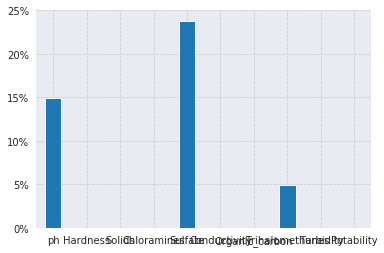

In [17]:
missing_values = df.isnull().sum()/ len(df)
plot_bar_charts(missing_values, title="")
plt.show()

### Listwise deletion

In [18]:
df_lwd = df[-(pd.isnull(df["ph"]) | pd.isnull(df["Trihalomethanes"]) | pd.isnull(df["Sulfate"]))]
X_lwd = df_lwd.drop(['Potability'],axis=1)
y_lwd = df_lwd['Potability']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_lwd,y_lwd,random_state=0)
pipe_svm = Pipeline([('scaler', StandardScaler()), ('svc', SVC(C=3, kernel='rbf', ))])
pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       354
           1       0.51      0.66      0.58       149

    accuracy                           0.71       503
   macro avg       0.67      0.70      0.68       503
weighted avg       0.74      0.71      0.72       503

0.7117296222664016


### Univariate feature imputation

In [20]:
X_imp = df.drop(['Potability'],axis=1)
y_imp = df['Potability']

In [21]:
imp_mean = SimpleImputer(strategy='mean')
X_imp_mean = imp_mean.fit_transform(X_imp)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X_imp_mean,y_imp,random_state=0)
pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.68      0.76       650
           1       0.34      0.63      0.44       169

    accuracy                           0.67       819
   macro avg       0.61      0.66      0.60       819
weighted avg       0.77      0.67      0.70       819

0.6678876678876678


### Multivariate feature imputation

In [23]:
it_imp = IterativeImputer()
columns = df.columns
df_it_imp = pd.DataFrame(it_imp.fit_transform(df))
df_it_imp.columns = columns
X_it_imp = df_it_imp.drop(['Potability'],axis=1)
y_it_imp = df_it_imp['Potability']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X_it_imp,y_it_imp,random_state=0)
pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.87      0.67      0.76       649
         1.0       0.33      0.62      0.43       170

    accuracy                           0.66       819
   macro avg       0.60      0.65      0.60       819
weighted avg       0.76      0.66      0.69       819

0.6617826617826618


### Combinaison des méthodes

Nous allons faire simpleimputer pour les deux champs avec le plus de missing values et prédire la valeur manquante pour Trihalomethanes

In [25]:
X_comb = df.drop(['Trihalomethanes'],axis=1)

In [26]:
X_comb_mean = pd.DataFrame(imp_mean.fit_transform(X_comb))
X_comb_mean["Trihalomethanes"] = df["Trihalomethanes"].to_list()
X_comb_mean.columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Turbidity', 'Potability', 'Trihalomethanes']
X_comb_mean = X_comb_mean[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                            'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']]
X_comb_mean["Trihalomethanes"] = pd.DataFrame(it_imp.fit_transform(X_comb_mean))

In [27]:
X = X_comb_mean.drop(['Potability'],axis=1)
y = X_comb_mean['Potability']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.89      0.68      0.77       650
         1.0       0.35      0.66      0.46       169

    accuracy                           0.68       819
   macro avg       0.62      0.67      0.62       819
weighted avg       0.78      0.68      0.71       819

0.6800976800976801


### Nous constatons qu'aucune des méthodes de gestions de données manquantes ne nous permet d'améliorer de manière significative les résultats hormis l'imputation de la moyenne par classe.

## SVM

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
params = {'svc__C':[0.001,0.01,0.1,1,3,5,7 ,10],
          'svc__kernel':['linear', 'rbf']}
#initializing the grid
svm = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
grid_svm = GridSearchCV(estimator=svm,param_grid=params,cv=3,verbose=3,n_jobs=-1)


In [31]:
grid_svm.fit(X_train, y_train)
y_pred = grid_svm.predict(X_test)
print("Best params", grid_svm.best_params_)
print(classification_report(y_pred, y_test))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best params {'svc__C': 3, 'svc__kernel': 'rbf'}
              precision    recall  f1-score   support

         0.0       0.89      0.68      0.77       650
         1.0       0.35      0.66      0.46       169

    accuracy                           0.68       819
   macro avg       0.62      0.67      0.62       819
weighted avg       0.78      0.68      0.71       819



## Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
params = {'log__C':[0.001,0.01,0.1,1,3,5,8, 10]}
#initializing the grid
log = Pipeline([('scaler', StandardScaler()), ('log', LogisticRegression())])
log_search = GridSearchCV(estimator=log,param_grid=params,cv=3,verbose=3,n_jobs=-1)


In [34]:
log_search.fit(X_train, y_train)
y_pred = log_search.predict(X_test)
print("Best params", log_search.best_params_)
print(classification_report(y_pred, y_test))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best params {'log__C': 1}
              precision    recall  f1-score   support

         0.0       1.00      0.62      0.76       816
         1.0       0.01      1.00      0.02         3

    accuracy                           0.62       819
   macro avg       0.50      0.81      0.39       819
weighted avg       1.00      0.62      0.76       819



## KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
params = {'knn__n_neighbors':range(1,34)}
#initializing the grid
knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
knn_search = GridSearchCV(estimator=knn,param_grid=params,cv=3,verbose=3)

In [37]:
knn_search.fit(X_train, y_train)
y_pred = knn_search.predict(X_test)
print("Best params", knn_search.best_params_)
print(classification_report(y_pred, y_test))

Fitting 3 folds for each of 33 candidates, totalling 99 fits
[CV 1/3] END ................knn__n_neighbors=1;, score=0.606 total time=   0.1s
[CV 2/3] END ................knn__n_neighbors=1;, score=0.611 total time=   0.1s
[CV 3/3] END ................knn__n_neighbors=1;, score=0.619 total time=   0.1s
[CV 1/3] END ................knn__n_neighbors=2;, score=0.629 total time=   0.1s
[CV 2/3] END ................knn__n_neighbors=2;, score=0.626 total time=   0.1s
[CV 3/3] END ................knn__n_neighbors=2;, score=0.635 total time=   0.1s
[CV 1/3] END ................knn__n_neighbors=3;, score=0.630 total time=   0.1s
[CV 2/3] END ................knn__n_neighbors=3;, score=0.621 total time=   0.1s
[CV 3/3] END ................knn__n_neighbors=3;, score=0.604 total time=   0.1s
[CV 1/3] END ................knn__n_neighbors=4;, score=0.625 total time=   0.1s
[CV 2/3] END ................knn__n_neighbors=4;, score=0.637 total time=   0.1s
[CV 3/3] END ................knn__n_neighbors=4;

## Random Forest

In [38]:
!python3 main.py

WARNING - drinkable water - No observers have been added to this run
INFO - drinkable water - Running command 'main'
INFO - drinkable water - Started
INFO - drinkable water - Result: 0.7955871932572538
INFO - drinkable water - Completed after 0:00:26


Les meilleurs résultats que nous obtenons sont avec le random forest. Nous avons une accurary pas loin de 80%. Avec la configuration:

fill_na_method = "mean by class"
remove_outliers = False
normalize_features = True
reduce_dimension = None
model_used = "Random Forest"

